In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [55]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
df['LotFrontage'].isnull().sum()

259

In [6]:
df['LotFrontage'].nunique()

110

<AxesSubplot:xlabel='LotFrontage'>

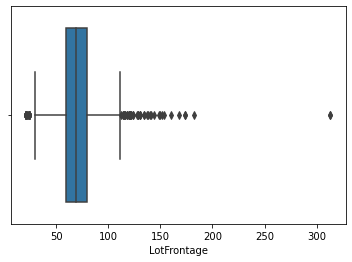

In [7]:
sns.boxplot(df.LotFrontage)

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

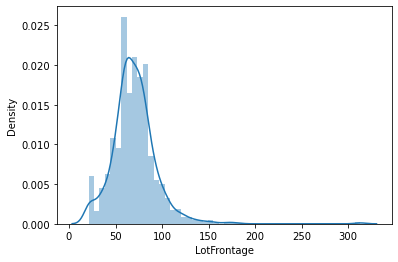

In [8]:
sns.distplot(df.LotFrontage)

In [9]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())#--------------->>Replacing null values with median

In [10]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [11]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])#------------->>Replacing null values with median
df['MasVnrType']=pd.factorize(df.MasVnrType)[0]#----------Also changing into numerical
df['MasVnrType'].isnull().sum()

0

In [54]:
df['BsmtQual'].nunique()

4

In [13]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtQual']=pd.factorize(df.BsmtQual)[0]
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtCond']=pd.factorize(df.MasVnrType)[0]

In [14]:
df['BsmtExposure'].unique()
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtExposure']=pd.factorize(df.BsmtExposure)[0]
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType1']=pd.factorize(df.BsmtFinType1)[0]
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType2']=pd.factorize(df.BsmtFinType1)[0]

In [15]:
df['Electrical'].value_counts()
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Electrical']=pd.factorize(df.Electrical)[0]

In [16]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['FireplaceQu']=pd.factorize(df.FireplaceQu)[0]

In [17]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])   
df['GarageType']=pd.factorize(df.GarageType)[0]
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageFinish']=pd.factorize(df.GarageFinish)[0]

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

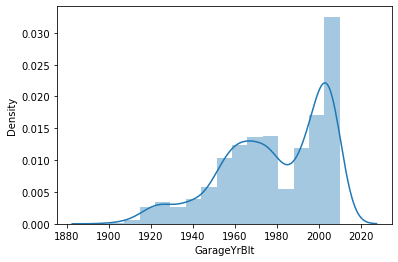

In [18]:
sns.distplot(df.GarageYrBlt)

<AxesSubplot:xlabel='GarageYrBlt'>

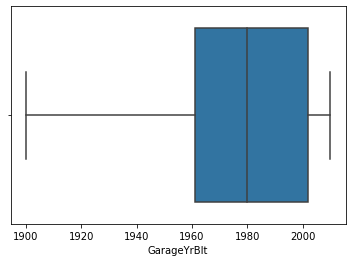

In [19]:
sns.boxplot(df.GarageYrBlt)

In [20]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

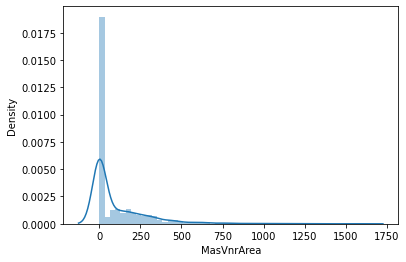

In [21]:
sns.distplot(df['MasVnrArea'])

In [22]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())#-------->>I could have used mode but lets have some non discrimination mindset.

In [23]:
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])   
df['GarageQual']=pd.factorize(df.GarageQual)[0]
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageCond']= pd.factorize(df.GarageCond)[0]

In [24]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [25]:
df['LotShape']=pd.factorize(df.LotShape)[0]
df['LotShape'].value_counts()

0    925
1    484
2     41
3     10
Name: LotShape, dtype: int64

In [26]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [27]:
df['Street'].isnull().sum()

0

In [28]:
df['Code']=pd.factorize(df.Street)[0]
df['Code'].value_counts()#------------------------->>> Pave:0  , Grvl: 1

0    1454
1       6
Name: Code, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

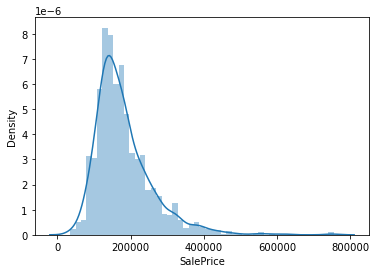

In [29]:
sns.distplot(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

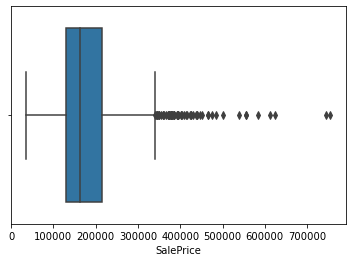

In [30]:
sns.boxplot(df['SalePrice'])

In [31]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
min_thresold,max_thresold = df.SalePrice.quantile([0.001,0.995])#------>> Using percentile method to remove outliers
min_thresold,max_thresold

(36499.351, 527331.9149999974)

In [33]:
df2 = df[(df.SalePrice < max_thresold) & (df.SalePrice >  min_thresold)]#----------->>> 10 columns 
df2.shape,df.shape

((1450, 82), (1460, 82))

In [34]:
df.corr()['SalePrice'] 

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
LotShape         0.267759
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrType      -0.010695
MasVnrArea       0.472614
BsmtQual        -0.004053
BsmtCond        -0.010695
BsmtExposure     0.229632
BsmtFinType1    -0.360407
BsmtFinSF1       0.386420
BsmtFinType2    -0.360407
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
Electrical      -0.231417
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
FireplaceQu      0.165078
GarageType      -0.101786
GarageYrBlt      0.466754
GarageFinish     0.141148
GarageCars       0.640409
GarageArea  

In [35]:
x = df2[['OverallQual','TotalBsmtSF','GrLivArea','GarageArea','GarageCars','FullBath','YearBuilt','YearRemodAdd','TotRmsAbvGrd','1stFlrSF','BsmtFinType1']].values
y = df2['SalePrice'].values

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
y_train.shape

(1015,)

In [38]:
ml = linear_model.LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [39]:
ml.coef_

array([ 1.83018032e+04,  1.36415328e+01,  3.44230184e+01,  9.99107509e+00,
        1.40470117e+04, -4.98882556e+03,  1.90969479e+02,  3.16311475e+02,
        2.38143899e+03,  1.29716991e+01, -3.13291236e+03])

In [40]:
ml.intercept_

-1050843.071398317

In [41]:
y_pred = ml.predict(x_test)

In [42]:
dataset = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(),'Difference': y_test-y_pred})
dataset.head(10)

,Actual,Predicted,Difference
0,303477,284845.666494,18631.333506
1,164000,180775.154274,-16775.154274
2,225000,230407.950761,-5407.950761
3,266000,264534.343345,1465.656655
4,415298,313515.488207,101782.511793
5,235000,191441.918643,43558.081357
6,187500,221392.164500,-33892.164500
7,200500,196479.990570,4020.009430
8,184100,215716.528488,-31616.528488
9,82500,40191.018847,42308.981153


In [43]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8420406393426514

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred)*100)

Mean Absolute Error: 21265.205134645636
MSE: 896981858.5983073
RMSE: 29949.655400326516
R Squared Score is: 84.20406393426514


<AxesSubplot:ylabel='Density'>

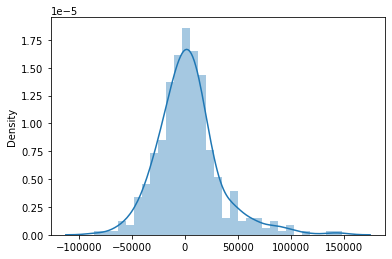

In [45]:
sns.distplot(y_test-y_pred)

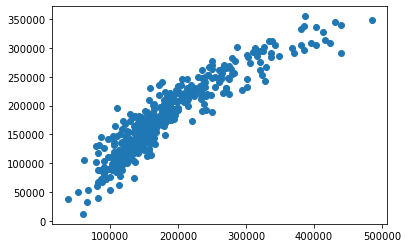

In [46]:
x = y_test
y = y_pred
#color = ['lightcoral', 'darkorange']
plt.scatter(x,y)
plt.show()

In [47]:
ml.score(x_test,y_test)*100

84.20406393426514

In [48]:
ml.score(x_train,y_train)

0.7570711449358877

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

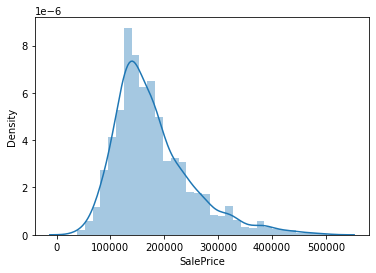

In [49]:
sns.distplot(df2['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

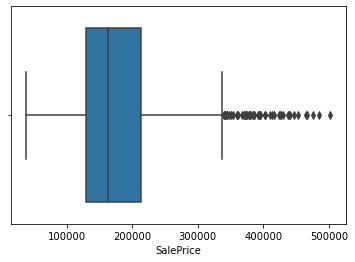

In [50]:
sns.boxplot(df2['SalePrice'])

<AxesSubplot:ylabel='Density'>

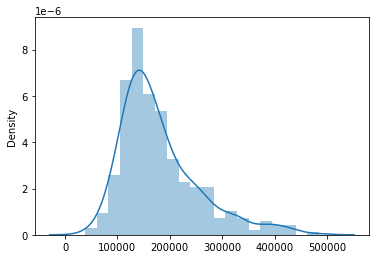

In [51]:
sns.distplot(y_test)

<AxesSubplot:ylabel='Density'>

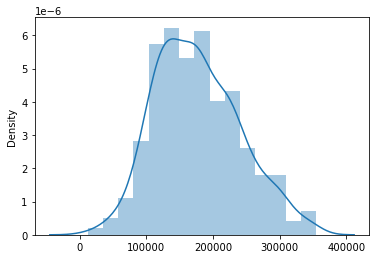

In [52]:
sns.distplot(y_pred)